In [174]:
# Install required packages
!pip install pandas matplotlib seaborn numpy statsmodels

# Optional: suppress warnings
import warnings
warnings.filterwarnings('ignore')

# TLS Handshake Performance Analysis

This notebook visualizes and compares the performance data of TLS handshakes using:
1. X25519 key exchange only
2. X25519MLKEM768 hybrid key exchange

In [175]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats

# Set styles for better visualization
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [176]:
# Load the CSV files
df_x25519 = pd.read_csv('timings_x25519.csv')
df_hybrid = pd.read_csv('timings_hybrid.csv')

# Display the first few rows of each dataset
print("X25519 Dataset:")
display(df_x25519.head())
print("\nX25519MLKEM768 Hybrid Dataset:")
display(df_hybrid.head())

X25519 Dataset:


,request_number,duration_microseconds
0,1,154825.833
1,2,11556.541
2,3,12359.375
3,4,10540.084
4,5,12451.708



X25519MLKEM768 Hybrid Dataset:


,request_number,duration_microseconds
0,1,141728.500
1,2,10254.250
2,3,9740.000
3,4,11213.708
4,5,10677.208


In [177]:
# Calculate basic statistics for both datasets
stats_x25519 = df_x25519['duration_microseconds'].describe()
stats_hybrid = df_hybrid['duration_microseconds'].describe()

print("X25519 Statistics:")
print(f"Average handshake time: {stats_x25519['mean']:.2f} μs")
print(f"Minimum handshake time: {stats_x25519['min']:.2f} μs")
print(f"Maximum handshake time: {stats_x25519['max']:.2f} μs")
print(f"Standard deviation: {stats_x25519['std']:.2f} μs")

print("\nX25519MLKEM768 Hybrid Statistics:")
print(f"Average handshake time: {stats_hybrid['mean']:.2f} μs")
print(f"Minimum handshake time: {stats_hybrid['min']:.2f} μs")
print(f"Maximum handshake time: {stats_hybrid['max']:.2f} μs")
print(f"Standard deviation: {stats_hybrid['std']:.2f} μs")

X25519 Statistics:
Average handshake time: 7459.42 μs
Minimum handshake time: 5635.25 μs
Maximum handshake time: 154825.83 μs
Standard deviation: 3878.73 μs

X25519MLKEM768 Hybrid Statistics:
Average handshake time: 7323.97 μs
Minimum handshake time: 5771.67 μs
Maximum handshake time: 141728.50 μs
Standard deviation: 3802.43 μs


In [178]:
# Calculate additional percentiles (95%, 98%, 99%) for both datasets
percentiles_x25519 = df_x25519['duration_microseconds'].quantile([0.95, 0.98, 0.99])
percentiles_hybrid = df_hybrid['duration_microseconds'].quantile([0.95, 0.98, 0.99])

print("X25519 Percentiles:")
print(f"95th Percentile: {percentiles_x25519[0.95]:.2f} μs")
print(f"98th Percentile: {percentiles_x25519[0.98]:.2f} μs")
print(f"99th Percentile: {percentiles_x25519[0.99]:.2f} μs")

print("\nX25519MLKEM768 Hybrid Percentiles:")
print(f"95th Percentile: {percentiles_hybrid[0.95]:.2f} μs")
print(f"98th Percentile: {percentiles_hybrid[0.98]:.2f} μs")
print(f"99th Percentile: {percentiles_hybrid[0.99]:.2f} μs")

X25519 Percentiles:
95th Percentile: 8647.28 μs
98th Percentile: 10297.92 μs
99th Percentile: 13008.07 μs

X25519MLKEM768 Hybrid Percentiles:
95th Percentile: 8038.54 μs
98th Percentile: 9592.59 μs
99th Percentile: 10567.81 μs


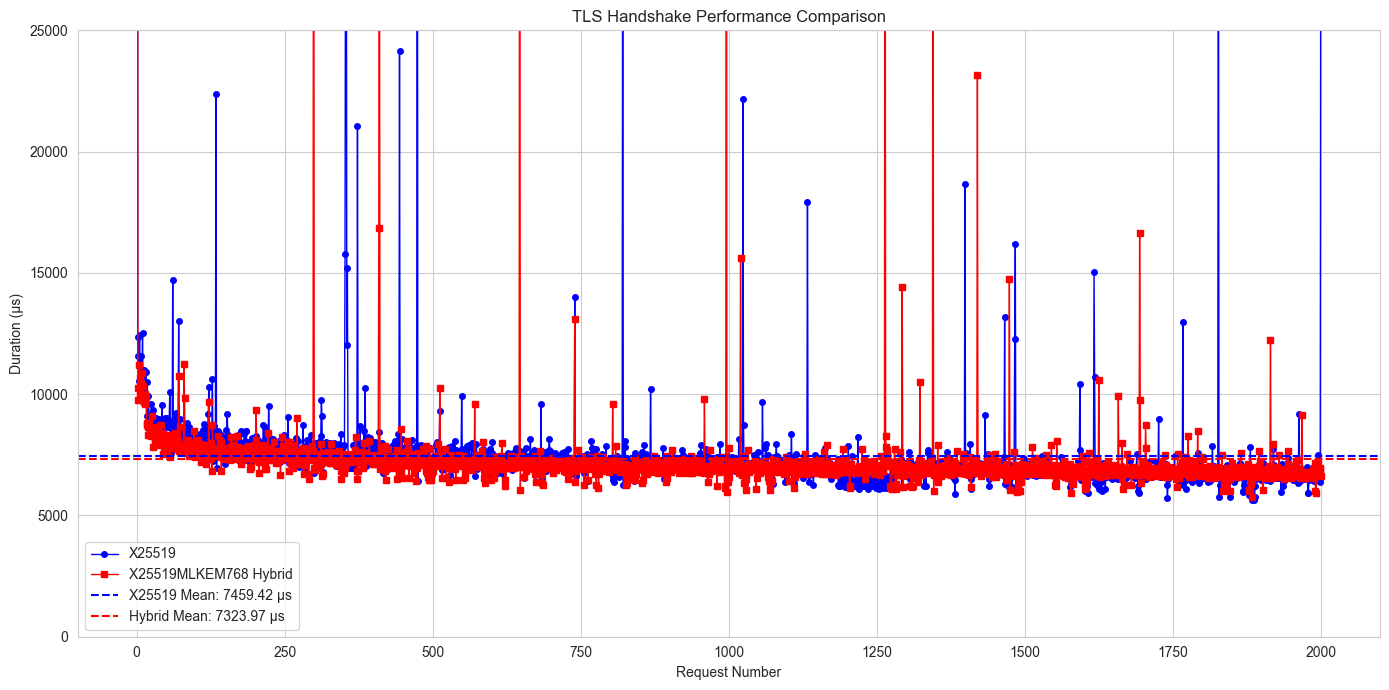

In [179]:
# Create a line plot comparing handshake times
plt.figure(figsize=(14, 7))

# Plot both datasets
plt.plot(df_x25519['request_number'], df_x25519['duration_microseconds'], 
         marker='o', linestyle='-', linewidth=1, markersize=4, color='blue', 
         label='X25519')
plt.plot(df_hybrid['request_number'], df_hybrid['duration_microseconds'], 
         marker='s', linestyle='-', linewidth=1, markersize=4, color='red', 
         label='X25519MLKEM768 Hybrid')

# Add mean lines
plt.axhline(y=stats_x25519['mean'], color='blue', linestyle='--', 
           label=f'X25519 Mean: {stats_x25519["mean"]:.2f} μs')
plt.axhline(y=stats_hybrid['mean'], color='red', linestyle='--', 
           label=f'Hybrid Mean: {stats_hybrid["mean"]:.2f} μs')

plt.title('TLS Handshake Performance Comparison')
plt.xlabel('Request Number')
plt.ylabel('Duration (μs)')
plt.ylim(0, 25000)  # Adjust y-axis to better show the data excluding outliers
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('tls_handshake_performance_comparison.png', dpi=300)
plt.show()

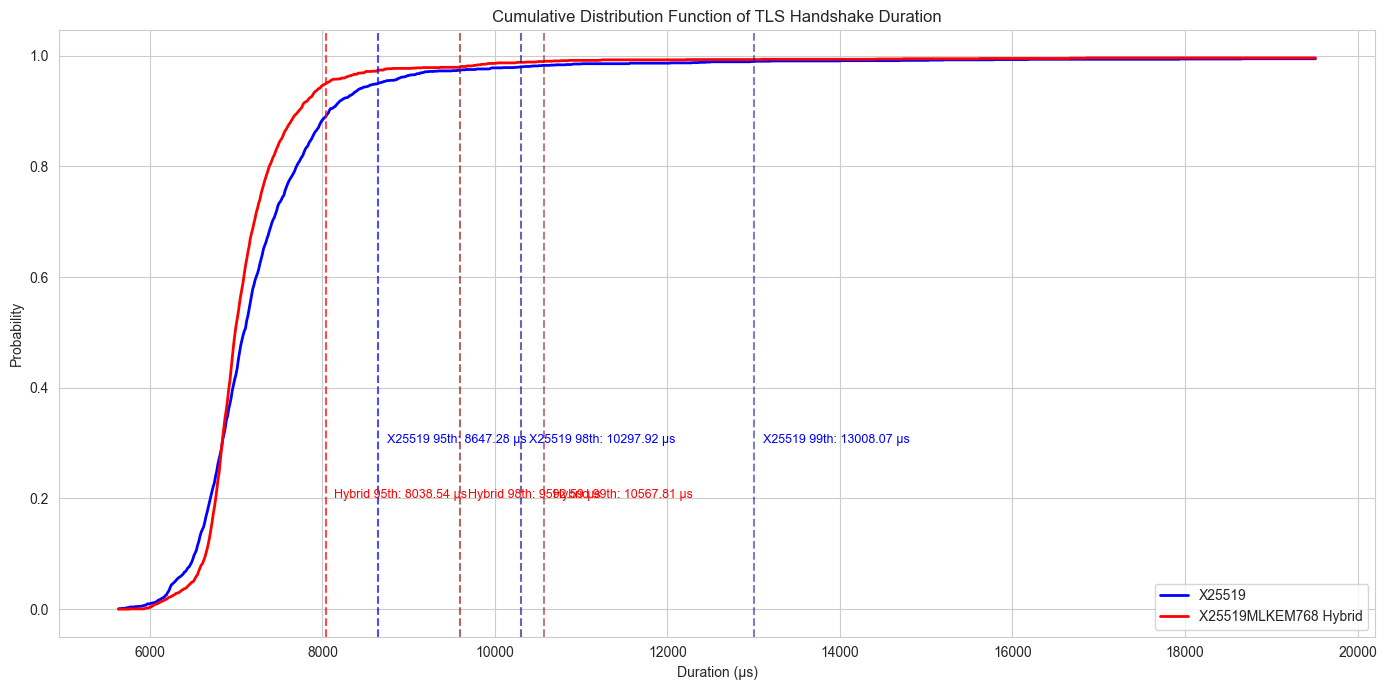

In [180]:
# Create Cumulative Distribution Function (CDF) plots for both datasets
# Compute the empirical CDFs
ecdf_x25519 = ECDF(df_x25519['duration_microseconds'])
ecdf_hybrid = ECDF(df_hybrid['duration_microseconds'])

# Create range for x-axis (exclude extreme outliers)
x_min = min(df_x25519['duration_microseconds'].min(), df_hybrid['duration_microseconds'].min())
x_max = max(df_x25519['duration_microseconds'].quantile(0.99), df_hybrid['duration_microseconds'].quantile(0.99)) * 1.5
x = np.linspace(x_min, x_max, 1000)

# Calculate CDF values
y_x25519 = ecdf_x25519(x)
y_hybrid = ecdf_hybrid(x)

# Plot the CDFs
plt.figure(figsize=(14, 7))
plt.plot(x, y_x25519, 'b-', linewidth=2, label='X25519')
plt.plot(x, y_hybrid, 'r-', linewidth=2, label='X25519MLKEM768 Hybrid')

# Add percentile lines for X25519
for p, color, alpha in zip([0.95, 0.98, 0.99], ['blue', 'navy', 'darkblue'], [0.7, 0.6, 0.5]):
    p_value = df_x25519['duration_microseconds'].quantile(p)
    plt.axvline(p_value, color=color, linestyle='--', alpha=alpha)
    plt.text(p_value + 100, 0.3, f'X25519 {int(p*100)}th: {p_value:.2f} μs', fontsize=9, color='blue')

# Add percentile lines for Hybrid
for p, color, alpha in zip([0.95, 0.98, 0.99], ['red', 'darkred', 'maroon'], [0.7, 0.6, 0.5]):
    p_value = df_hybrid['duration_microseconds'].quantile(p)
    plt.axvline(p_value, color=color, linestyle='--', alpha=alpha)
    plt.text(p_value + 100, 0.2, f'Hybrid {int(p*100)}th: {p_value:.2f} μs', fontsize=9, color='red')

plt.title('Cumulative Distribution Function of TLS Handshake Duration')
plt.xlabel('Duration (μs)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('tls_handshake_cdf_comparison.png', dpi=300)
plt.show()

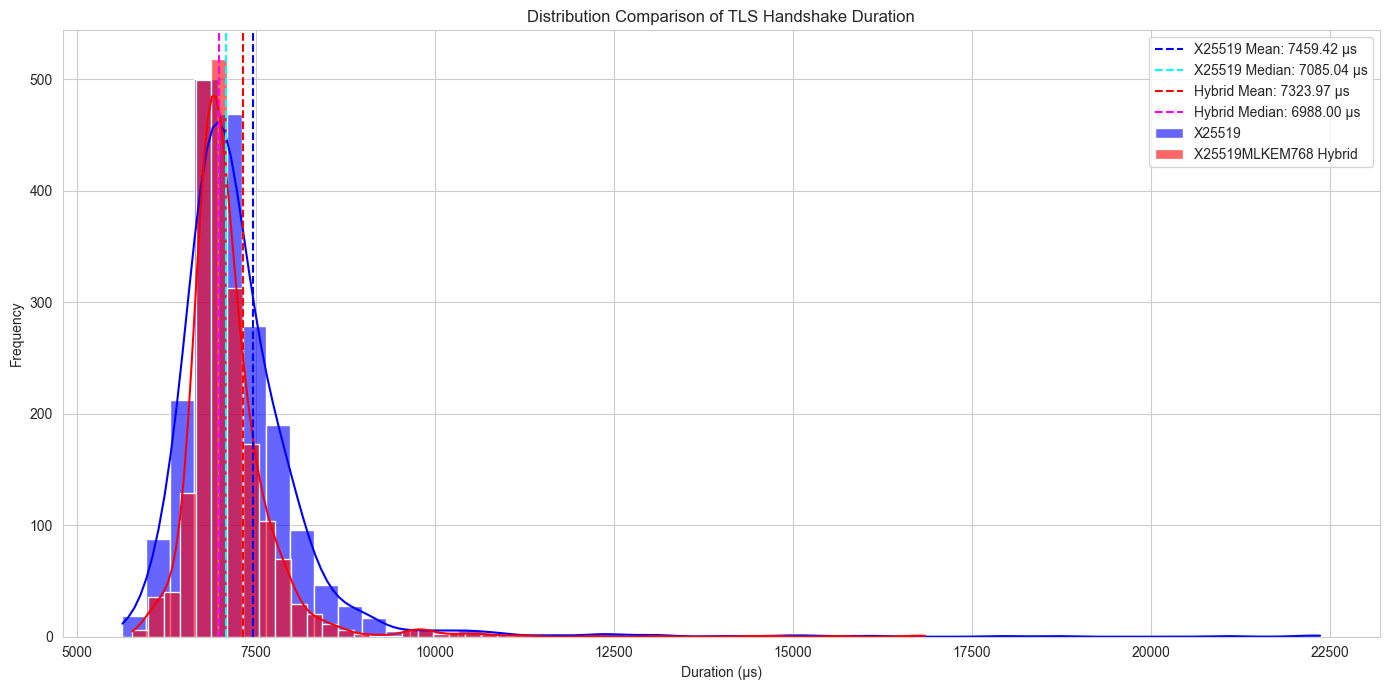

In [181]:
# Create histograms to compare the distribution of handshake times
plt.figure(figsize=(14, 7))

# Filter out the extreme outliers for better visualization
x25519_filtered = df_x25519[df_x25519['duration_microseconds'] < stats_x25519['75%'] * 3]
hybrid_filtered = df_hybrid[df_hybrid['duration_microseconds'] < stats_hybrid['75%'] * 3]

# Calculate best bin sizes using Freedman-Diaconis rule
def freedman_diaconis(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1/3))
    bins = int((data.max() - data.min()) / bin_width) if bin_width > 0 else 30
    return max(10, min(bins, 50))  # Ensure bins are between 10 and 50

bins_x25519 = freedman_diaconis(x25519_filtered['duration_microseconds'])
bins_hybrid = freedman_diaconis(hybrid_filtered['duration_microseconds'])
bins = max(bins_x25519, bins_hybrid)

# Create histograms with appropriate bin sizes
sns.histplot(x25519_filtered['duration_microseconds'], kde=True, bins=bins,
             color='blue', alpha=0.6, label='X25519', legend=True)
sns.histplot(hybrid_filtered['duration_microseconds'], kde=True, bins=bins,
             color='red', alpha=0.6, label='X25519MLKEM768 Hybrid', legend=True)

# Add mean and median lines for X25519
plt.axvline(x=stats_x25519['mean'], color='blue', linestyle='--',
            label=f'X25519 Mean: {stats_x25519["mean"]:.2f} μs')
plt.axvline(x=stats_x25519['50%'], color='cyan', linestyle='--',
            label=f'X25519 Median: {stats_x25519["50%"]:.2f} μs')

# Add mean and median lines for Hybrid
plt.axvline(x=stats_hybrid['mean'], color='red', linestyle='--',
            label=f'Hybrid Mean: {stats_hybrid["mean"]:.2f} μs')
plt.axvline(x=stats_hybrid['50%'], color='magenta', linestyle='--',
            label=f'Hybrid Median: {stats_hybrid["50%"]:.2f} μs')

plt.title('Distribution Comparison of TLS Handshake Duration')
plt.xlabel('Duration (μs)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('tls_handshake_distribution_comparison.png', dpi=300)
plt.show()

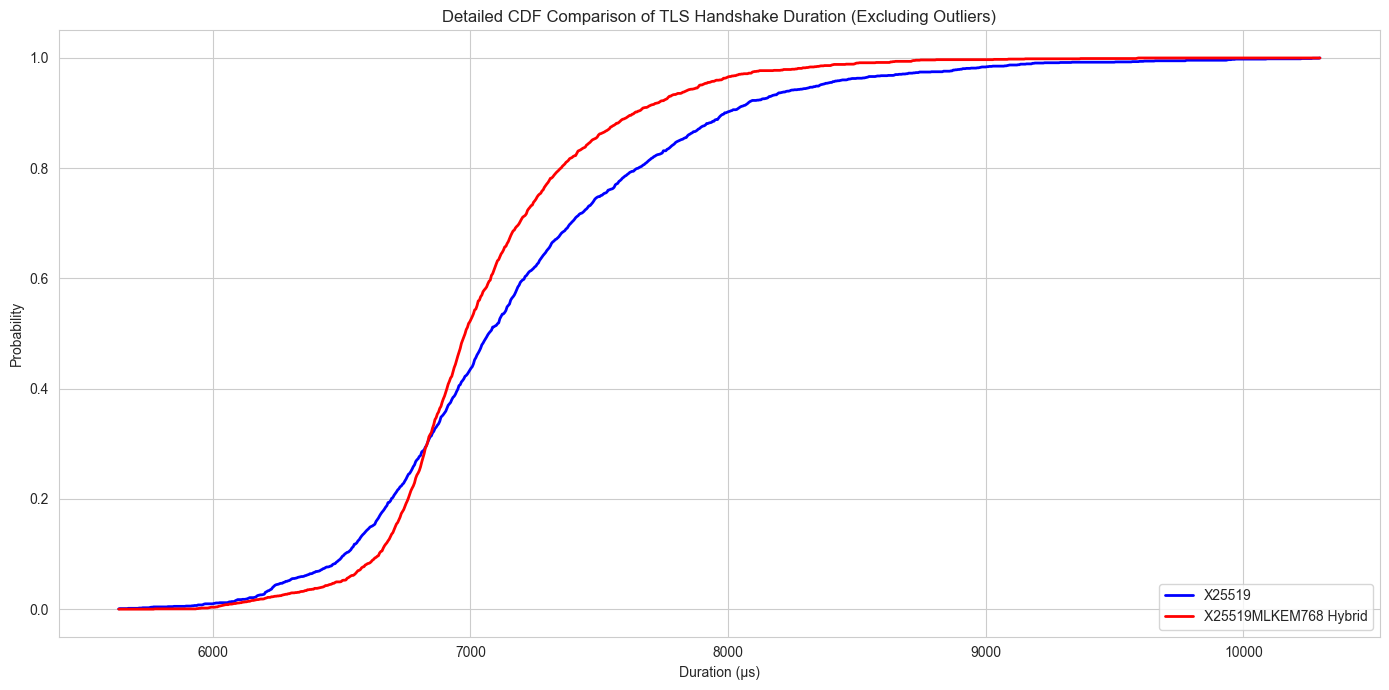

In [182]:
# Detailed comparison of the CDFs - just looking at the main data (excluding outliers)

# Filter out outliers for better visualization
df_x25519_filtered = df_x25519[df_x25519['duration_microseconds'] < df_x25519['duration_microseconds'].quantile(0.98)]
df_hybrid_filtered = df_hybrid[df_hybrid['duration_microseconds'] < df_hybrid['duration_microseconds'].quantile(0.98)]

# Recompute the empirical CDFs for filtered data
ecdf_x25519_filtered = ECDF(df_x25519_filtered['duration_microseconds'])
ecdf_hybrid_filtered = ECDF(df_hybrid_filtered['duration_microseconds'])

# Create range for x-axis with better focus
x_min_filtered = min(df_x25519_filtered['duration_microseconds'].min(), df_hybrid_filtered['duration_microseconds'].min())
x_max_filtered = max(df_x25519_filtered['duration_microseconds'].max(), df_hybrid_filtered['duration_microseconds'].max())
x_filtered = np.linspace(x_min_filtered, x_max_filtered, 1000)

# Calculate CDF values
y_x25519_filtered = ecdf_x25519_filtered(x_filtered)
y_hybrid_filtered = ecdf_hybrid_filtered(x_filtered)

# Plot the filtered CDFs
plt.figure(figsize=(14, 7))
plt.plot(x_filtered, y_x25519_filtered, 'b-', linewidth=2, label='X25519')
plt.plot(x_filtered, y_hybrid_filtered, 'r-', linewidth=2, label='X25519MLKEM768 Hybrid')

plt.title('Detailed CDF Comparison of TLS Handshake Duration (Excluding Outliers)')
plt.xlabel('Duration (μs)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('tls_handshake_cdf_detailed_comparison.png', dpi=300)
plt.show()

In [183]:
# Statistical analysis and comparison between X25519 and X25519MLKEM768 Hybrid

# Remove outliers for more accurate analysis
# Using IQR method to identify outliers
def remove_outliers(df):
    Q1 = df['duration_microseconds'].quantile(0.25)
    Q3 = df['duration_microseconds'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['duration_microseconds'] >= lower_bound) & (df['duration_microseconds'] <= upper_bound)]

x25519_clean = remove_outliers(df_x25519)
hybrid_clean = remove_outliers(df_hybrid)

# Calculate clean statistics
x25519_mean = x25519_clean['duration_microseconds'].mean()
hybrid_mean = hybrid_clean['duration_microseconds'].mean()

# Calculate performance difference
perf_diff = hybrid_mean - x25519_mean
perf_pct = (perf_diff / x25519_mean) * 100

print(f"Performance Comparison (after removing outliers):")
print(f"X25519 Mean: {x25519_mean:.2f} μs")
print(f"Hybrid Mean: {hybrid_mean:.2f} μs")
print(f"Absolute Difference: {abs(perf_diff):.2f} μs")

if perf_diff > 0:
    print(f"Hybrid is {perf_pct:.2f}% slower than X25519")
else:
    print(f"Hybrid is {abs(perf_pct):.2f}% faster than X25519")

# Perform t-test to determine if the difference is statistically significant
t_stat, p_value = stats.ttest_ind(x25519_clean['duration_microseconds'], hybrid_clean['duration_microseconds'])
print(f"\nStatistical significance test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The performance difference is statistically significant (p < 0.05)")
else:
    print("The performance difference is not statistically significant (p >= 0.05)")

Performance Comparison (after removing outliers):
X25519 Mean: 7127.56 μs
Hybrid Mean: 7027.42 μs
Absolute Difference: 100.14 μs
Hybrid is 1.41% faster than X25519

Statistical significance test:
t-statistic: 6.6985
p-value: 0.0000
The performance difference is statistically significant (p < 0.05)


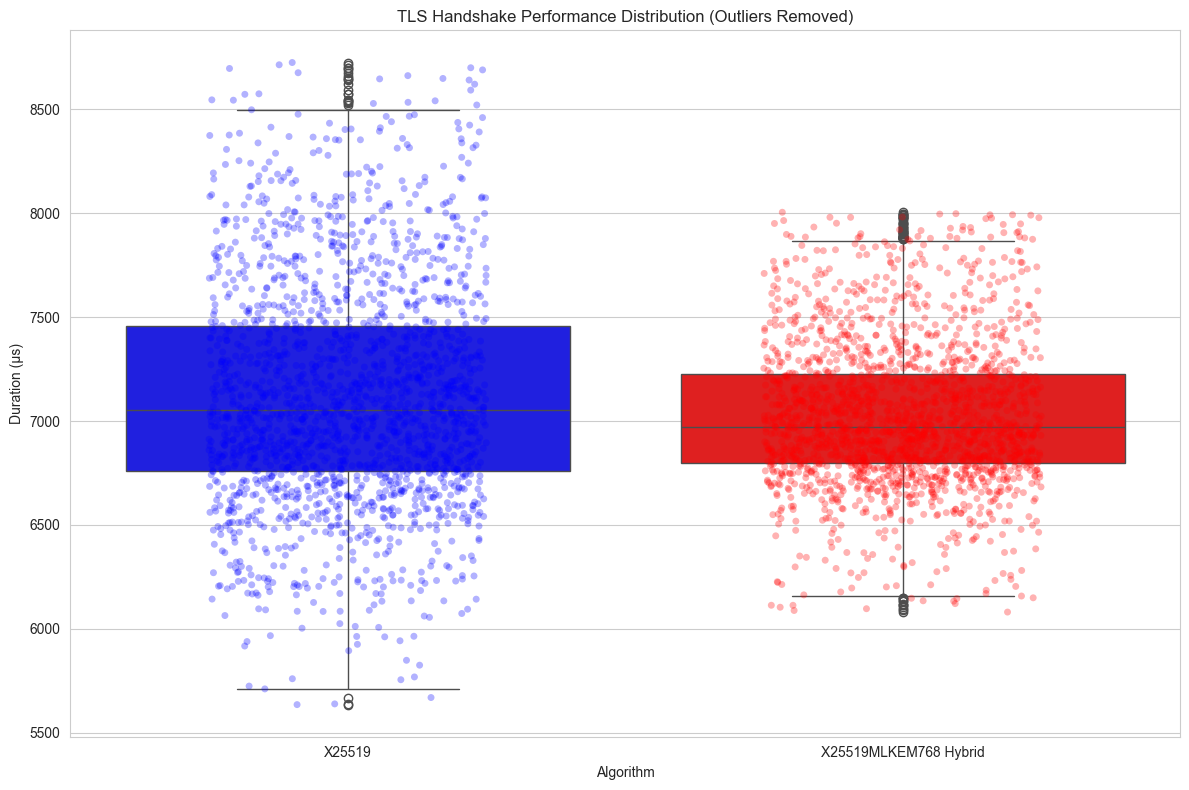

Percentile Comparison Table:


,Percentile,X25519 (μs),X25519MLKEM768 (μs),Difference (μs),Difference (%)
0,5%,6292.63,6499.76,207.13,3.29
1,25%,6775.10,6803.79,28.69,0.42
2,50%,7085.04,6988.00,-97.04,-1.37
3,75%,7556.30,7286.60,-269.70,-3.57
4,95%,8647.28,8038.54,-608.74,-7.04
5,99%,13008.07,10567.81,-2440.26,-18.76


In [184]:
# Box plot comparison of the two algorithms
plt.figure(figsize=(12, 8))

# Create a combined dataframe for box plotting
df_x25519_clean = x25519_clean.copy()
df_hybrid_clean = hybrid_clean.copy()

df_x25519_clean['Algorithm'] = 'X25519'
df_hybrid_clean['Algorithm'] = 'X25519MLKEM768 Hybrid'

df_combined = pd.concat([df_x25519_clean, df_hybrid_clean])

# Create the box plot
ax = sns.boxplot(x='Algorithm', y='duration_microseconds', data=df_combined, 
               palette={'X25519': 'blue', 'X25519MLKEM768 Hybrid': 'red'})

# Add data points with jitter for better visibility
sns.stripplot(x='Algorithm', y='duration_microseconds', data=df_combined,
            palette={'X25519': 'blue', 'X25519MLKEM768 Hybrid': 'red'},
            alpha=0.3, jitter=0.25)

# Customize the plot
plt.title('TLS Handshake Performance Distribution (Outliers Removed)')
plt.ylabel('Duration (μs)')
plt.tight_layout()
plt.savefig('tls_handshake_boxplot_comparison.png', dpi=300)
plt.show()

# Create a table of key percentiles for easy comparison
percentiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
x25519_percentiles = df_x25519['duration_microseconds'].quantile(percentiles)
hybrid_percentiles = df_hybrid['duration_microseconds'].quantile(percentiles)

# Calculate percentage difference at each percentile
percentile_diff = (hybrid_percentiles - x25519_percentiles) / x25519_percentiles * 100

# Create a DataFrame to display the results
comparison_table = pd.DataFrame({
    'Percentile': [f"{int(p*100)}%" for p in percentiles],
    'X25519 (μs)': x25519_percentiles.values.round(2),
    'X25519MLKEM768 (μs)': hybrid_percentiles.values.round(2),
    'Difference (μs)': (hybrid_percentiles - x25519_percentiles).values.round(2),
    'Difference (%)': percentile_diff.values.round(2)
})

print("Percentile Comparison Table:")
display(comparison_table)